<a href="https://colab.research.google.com/github/dankernel/mnist-qnn/blob/main/notebook/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터셋

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
digit_mnist = keras.datasets.mnist

(_train_images, _train_labels), (test_images, test_labels) = digit_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images = _train_images[:50000]
train_labels = _train_labels[:50000]
val_images = _train_images[50000:]
val_labels = _train_labels[50000:]

In [4]:
train_images[0].shape

(28, 28)

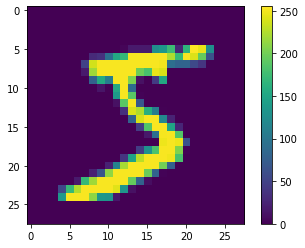

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# train_images = train_images / 255.0
# test_images = test_images / 255.0

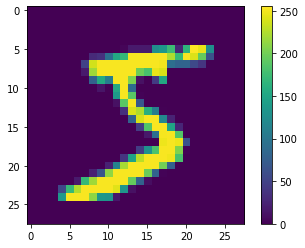

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
layer_flatten = keras.layers.Flatten(input_shape=(28, 28))
layer_FC1 = keras.layers.Dense(128, activation='relu', use_bias=False)
layer_FC2 = keras.layers.Dense(64, activation='relu', use_bias=False)
layer_FC3 = keras.layers.Dense(10, activation='softmax', use_bias=False)

model = keras.Sequential([
    layer_flatten,
    layer_FC1,
    layer_FC2,
    layer_FC3,
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100352    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8192      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                640       
Total params: 109,184
Trainable params: 109,184
Non-trainable params: 0
_________________________________________________________________


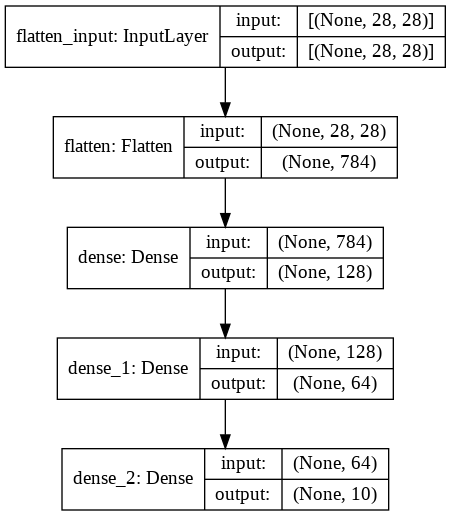

In [9]:
from IPython.display import Image 
from keras.utils.vis_utils import plot_model

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=False, show_layer_names=True)

Image('model.png')

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=30, validation_data=(train_images, train_labels))

Epoch 1/30
1563/1563 [==============================] - 7s 3ms/step - loss: 2.2172 - accuracy: 0.8587 - val_loss: 0.4421 - val_accuracy: 0.9131
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.9197 - val_loss: 0.2580 - val_accuracy: 0.9367
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2546 - accuracy: 0.9381 - val_loss: 0.1982 - val_accuracy: 0.9501
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2083 - accuracy: 0.9467 - val_loss: 0.2077 - val_accuracy: 0.9433
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1793 - accuracy: 0.9530 - val_loss: 0.1271 - val_accuracy: 0.9633
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1379 - accuracy: 0.9612 - val_loss: 0.1451 - val_accuracy: 0.9608
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1284 - accuracy: 0.9647 - val_loss: 0.0947 - val_accuracy:

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.2019 - accuracy: 0.9701

테스트 정확도: 0.9700999855995178


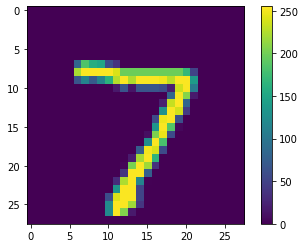

In [13]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
predictions = model.predict(test_images[:1, :, :])
print(predictions)

[[1.09490902e-10 6.08600355e-14 1.58442717e-08 4.63801358e-10
  1.00404744e-14 2.53800410e-12 9.35161070e-38 9.99995232e-01
  5.82893705e-13 4.72795728e-06]]


In [15]:
np.argmax(predictions)

7

In [16]:
print(test_images[0, :, :].shape)

(28, 28)


In [17]:
! pip install tensorflow_model_optimization

     |████████████████████████████████| 215kB 9.2MB/s 


In [18]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer (QuantizeLaye (None, 28, 28)            3         
_________________________________________________________________
quant_flatten (QuantizeWrapp (None, 784)               1         
_________________________________________________________________
quant_dense (QuantizeWrapper (None, 128)               100357    
_________________________________________________________________
quant_dense_1 (QuantizeWrapp (None, 64)                8197      
_________________________________________________________________
quant_dense_2 (QuantizeWrapp (None, 10)                645       
Total params: 109,203
Trainable params: 109,184
Non-trainable params: 19
_________________________________________________________________


In [19]:
train_images_subset = train_images
train_labels_subset = train_labels

q_aware_model.fit(train_images_subset, train_labels_subset,
                  batch_size=500, epochs=30, validation_split=0.1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


90/90 [==============================] - 1s 5ms/step - loss: 0.4180 - accuracy: 0.9213 - val_loss: 0.1371 - val_accuracy: 0.9586
Epoch 2/30
90/90 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9798 - val_loss: 0.0594 - val_accuracy: 0.9846
Epoch 3/30
90/90 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9921 - val_loss: 0.0370 - val_accuracy: 0.9922
Epoch 4/30
90/90 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9951 - val_loss: 0.0258 - val_accuracy: 0.9938
Epoch 5/30
90/90 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0281 - val_accuracy: 0.9928
Epoch 6/30
90/90 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0277 - val_accuracy: 0.9934
Epoch 7/30
90/90 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0323 - val_accuracy: 0.9942
Epoch 8/30
90/90 [=============

In [20]:
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

_, q_aware_model_accuracy = q_aware_model.evaluate(
   test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Quant test accuracy:', q_aware_model_accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Baseline test accuracy: 0.9700999855995178
Quant test accuracy: 0.9740999937057495


In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp03yp6blh/assets


INFO:tensorflow:Assets written to: /tmp/tmp03yp6blh/assets


In [24]:
f = open("mnist_dkdk_20170705_no_bias_v1.tflite", "wb")
f.write(quantized_tflite_model)
f.close()

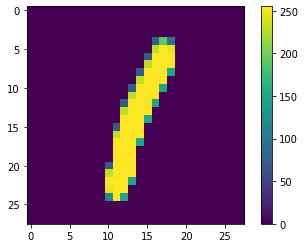

In [28]:
import cv2
inp = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)
inp = inp.reshape(28, 28)
plt.figure()
plt.imshow(inp)
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
predictions = q_aware_model.predict(inp.reshape(1, 28, 28))
# predictions = model.predict(inp.reshape(1, 28, 28))

print(predictions)
print(np.argmax(predictions))

[[0.0000000e+00 1.0000000e+00 8.1749467e-30 0.0000000e+00 1.1690813e-25
  6.8360474e-32 5.7164336e-34 9.7760820e-28 1.1690813e-25 0.0000000e+00]]
1


In [ ]:
# print(inp.reshape(-1))

In [ ]:
predictions = model.predict(inp.reshape(1, 28, 28))
print(predictions)
print(np.argmax(predictions))

[[1.83323969e-34 1.01800609e-21 1.13914654e-23 1.37730280e-27
  1.00000000e+00 1.70167550e-28 2.32253749e-35 2.73914225e-11
  7.61927222e-24 2.31235387e-12]]
4
